In [139]:
from pandas import read_csv, to_datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=13, titlesize=14)

# Le prix de soutien

In [140]:
ps = read_csv('CCL_prix_de_soutien.csv', sep = ';', decimal = ',',
              parse_dates=['Annee'], infer_datetime_format=True, dayfirst=True)

In [141]:
ps.head()

,Annee,Beurre,PLE
0,2018-09-01,8.3901,4.5302
1,2016-09-01,8.0062,4.5302
2,2016-02-01,7.7815,4.4176
3,2015-02-01,7.4046,6.3109
4,2014-02-01,7.4046,6.4754


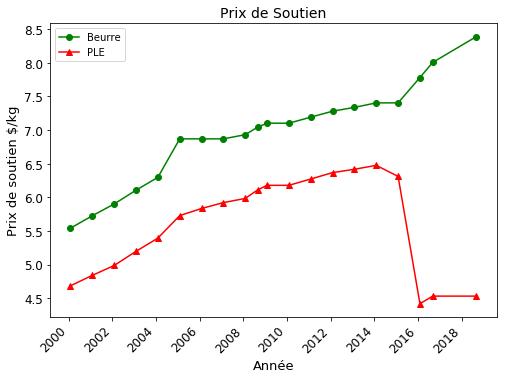

In [142]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(ps.Annee, ps.Beurre, marker = 'o', c = 'green')
ax.plot(ps.Annee, ps.PLE, marker = '^', c = 'red')
ax.set_xlabel('Année')
ax.set_ylabel('Prix de soutien $/kg')
ax.set_title('Prix de Soutien')
ax.legend()
fig.autofmt_xdate(rotation=45)
plt.show()

# La diminuition dans le nombre de fermes laitières au Canada

In [314]:
fermes = read_csv('fermes_temps.csv', skiprows=7)
fermes['Québec et Ontario'] = (fermes.QC + fermes.ON)
fermes["Provinces de l'Ouest"] = (fermes.MB + fermes.SK + fermes.AB + fermes.BC)
fermes["Provinces de l'Atlantique"] = (fermes.NB + fermes.NS + fermes.PE + fermes.NL)
fermes['QC-ON'] = (fermes.QC + fermes.ON)/fermes.Canada
fermes['Ouest'] = (fermes.MB + fermes.SK + fermes.AB + fermes.BC)/fermes.Canada
fermes['Atlantique'] = (fermes.NB + fermes.NS + fermes.PE + fermes.NL)/fermes.Canada
fermes.head()

,Année,BC,AB,SK,MB,ON,QC,NB,NS,PE,NL,Canada,Québec et Ontario,Provinces de l'Ouest,Provinces de l'Atlantique,QC-ON,Ouest,Atlantique
0,2017,400,523,160,282,3613,5368,194,213,166,32,10951,8981,1365,605,0.820108,0.124646,0.055246
1,2016,417,531,159,285,3731,5546,199,221,168,32,11289,9277,1392,620,0.821773,0.123306,0.054921
2,2015,437,547,163,299,3834,5766,206,225,174,32,11683,9600,1446,637,0.821707,0.123770,0.054524
3,2014,455,566,166,308,3926,5894,206,229,180,32,11962,9820,1495,647,0.820933,0.124979,0.054088
4,2013,475,571,166,321,3997,6038,211,235,187,33,12234,10035,1533,666,0.820255,0.125307,0.054438


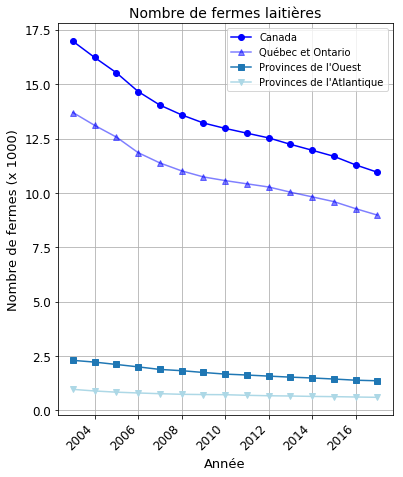

In [319]:
fig, ax = plt.subplots(figsize=(6, 8))
ax.plot(fermes['Année'], fermes.Canada/1000, marker = 'o', c = 'blue')
ax.plot(fermes['Année'], fermes['Québec et Ontario']/1000, c = 'blue',
        alpha = 0.5, marker = '^')
ax.plot(fermes['Année'], fermes["Provinces de l'Ouest"]/1000, marker = 's')
ax.plot(fermes['Année'], fermes["Provinces de l'Atlantique"]/1000, marker = 'v',
        c = 'lightblue')
ax.set_xlabel('Année')
ax.set_ylabel('Nombre de fermes (x 1000)')
ax.set_title('Nombre de fermes laitières')
ax.grid()
ax.legend()
fig.autofmt_xdate(rotation=45)
plt.show()

Source: [Centre Canadien d'Information Laitière (CCIL), Rapport D056 ](http://aimis-simia-cdic-ccil.agr.gc.ca/rp/index-fra.cfm?action=pR&r=720&pdctc=)

En 2017, on dénombrait 10951 fermes laitières au Canada, le Québec et l’Ontario accueillaient 82 % de ces fermes, les provinces de l’Ouest, 12,5 % et les provinces de l’Atlantique, 5,5 %.

# L'Offre

## Le Droit de Production au Québec - matière grasse (MG)

###### **DroitProductionMatiereGrasse.csv**

- Note(s) :  Droit de production (matière grasse) : à chaque mise à jour, les données sont révisées sur une période pouvant aller jusqu’à 3 ans précédant le mois courant. Le total pour l’année en cours correspond au cumulatif jusqu’au mois courant. Les données se rapportent aux producteurs québécois faisant affaire avec la Fédération des producteurs de lait du Québec.
- Source(s) :  Institut de la statistique du Québec (ISQ). Fédération des producteurs de lait du Québec (FPLQ). 
- Compilation(s) :  Institut de la statistique du Québec.

In [148]:
quota = read_csv('DroitProductionMatiereGrasse.csv', sep=';', skiprows=1,
                    parse_dates=['Temps'], infer_datetime_format=True)

quota = quota.rename(columns={"Élément statistique": "element",
                              "1er niveau de détail": "detail",
                              "Territoire": "territoire",
                              "Temps": "temps",
                              "Unité de mesure": "unite",
                              "Valeur numérique": "valeur",
                              "Note": "note"})
quota.head()

,element,detail,territoire,temps,unite,valeur,note
0,Droit de production (matière grasse),Quotidien,Québec,1999-01-01,kg,288316,NaN
1,Droit de production (matière grasse),Quotidien,Québec,1999-02-01,kg,287350,NaN
2,Droit de production (matière grasse),Quotidien,Québec,1999-03-01,kg,287327,NaN
3,Droit de production (matière grasse),Quotidien,Québec,1999-04-01,kg,288583,NaN
4,Droit de production (matière grasse),Quotidien,Québec,1999-05-01,kg,288174,NaN


In [149]:
quota_q = quota[quota['detail'] == 'Quotidien']
quota_m = quota[quota['detail'] == 'Mensuel']

In [438]:
#quota_q.tail()
#quota_m.tail()

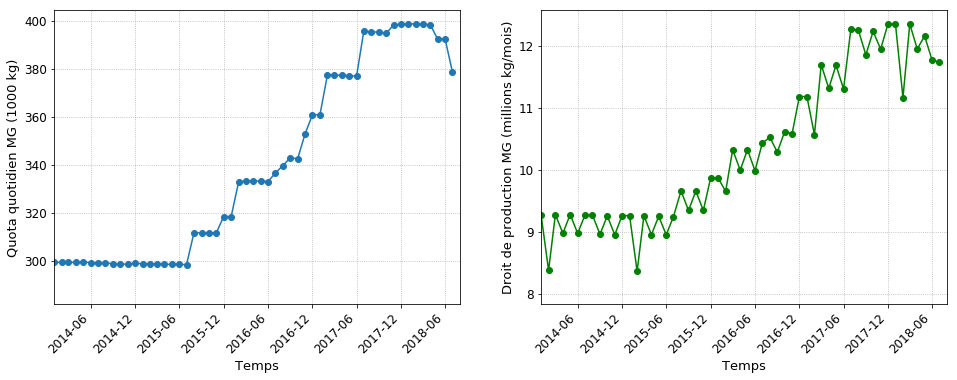

In [433]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
fig.autofmt_xdate(rotation=45)

ax1.plot(quota_q.temps, quota_q.valeur/1000, marker = 'o')
ax1.set_xlim('01-2014','08-2018')
ax1.set_xlabel('Temps')
ax1.set_ylabel('Quota quotidien MG (1000 kg)')
ax1.grid(linestyle = 'dotted')

ax2.plot(quota_m.temps, quota_m.valeur/(10**6), marker = 'o', c='g')
ax2.set_xlim('01-2014','08-2018')
ax2.set_xlabel('Temps')
ax2.set_ylabel('Droit de production MG (millions kg/mois)')
ax2.grid(linestyle = 'dotted')

plt.show()

Sources: Institut de la statistique du Québec (ISQ), Fédération des producteurs de lait du Québec (FPLQ)
<br>
Compilation: [Institut de la statistique du Québec](http://www.bdso.gouv.qc.ca/pls/ken/ken214_tabl_detl.page_detl?p_iden_tran=REPERK547XJ20-14125033193695l7&p_lang=1&p_id_ss_domn=1053&p_id_raprt=1969)

### Est-ce que l'écart entre la production et les quotas est stable dans le temps?

In [152]:
quota_e = quota[quota['detail'] == '..Écart mensuel à la production']

In [153]:
quota_e.tail()

,element,detail,territoire,temps,unite,valeur,note
700,Droit de production (matière grasse),..Écart mensuel à la production,Québec,2018-03-01,kg,21418,NaN
701,Droit de production (matière grasse),..Écart mensuel à la production,Québec,2018-04-01,kg,27065,NaN
702,Droit de production (matière grasse),..Écart mensuel à la production,Québec,2018-05-01,kg,57230,NaN
703,Droit de production (matière grasse),..Écart mensuel à la production,Québec,2018-06-01,kg,-132735,NaN
704,Droit de production (matière grasse),..Écart mensuel à la production,Québec,2018-07-01,kg,-331820,NaN


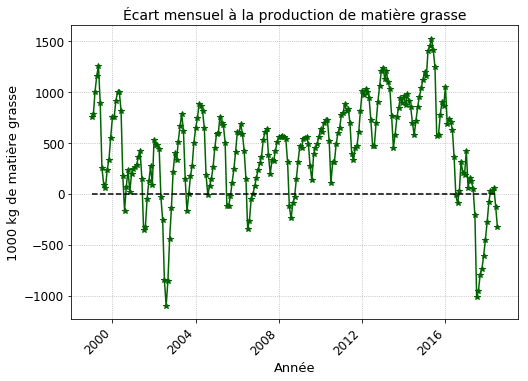

In [205]:
fig, ax = plt.subplots(figsize=(8, 6))
fig.autofmt_xdate(rotation=45)

ax.plot(quota_e.temps, quota_e.valeur/1000, marker = '*', c = 'darkgreen')
ax.plot(np.array(['1999-01', '2018-07'], dtype='datetime64'),
        (0,0), c = 'black', linestyle = 'dashed')
#ax.set_xlim('2016-01','2018-07')
ax.set_xlabel('Année')
ax.set_ylabel('1000 kg de matière grasse')
ax.set_title('Écart mensuel à la production de matière grasse')
ax.grid(linestyle = 'dotted')

plt.show()

Sources: Institut de la statistique du Québec (ISQ), Fédération des producteurs de lait du Québec (FPLQ)
<br>
Compilation: [Institut de la statistique du Québec](http://www.bdso.gouv.qc.ca/pls/ken/ken214_tabl_detl.page_detl?p_iden_tran=REPERK547XJ20-14125033193695l7&p_lang=1&p_id_ss_domn=1053&p_id_raprt=1969)

In [155]:
print('moyenne (x 1000 kg): %.i'% (quota_e.valeur.mean()/1000))
print('écart type (x 1000 kg): %.i'% (quota_e.valeur.std()/1000))

moyenne (x 1000 kg): 434
écart type (x 1000 kg): 466


La production mensuelle de matière grasse au Québec est restée en moyenne 434.000 kg au-dessus du droit à la production depuis l'an 2000. L'écart type est 466.000 kg. Une saisonnalité annuelle est observée dans l'écart entre la production et les quotas. Les écart minimum se produisent normalment au mois de juin.

## Le Producteurs Laitiers au Québec

Producteurs laitiers: nombre de producteurs distincts qui ont vendu du lait à la Fédération des producteurs de lait du Québec.

In [157]:
producteurs = read_csv('ProducteursLaitiers.csv', sep=';', skiprows=1,
                    parse_dates=['Temps'], infer_datetime_format=True)

producteurs = producteurs.rename(columns={"Élément statistique": "element",
                              "Territoire": "territoire",
                              "Temps": "temps",
                              "Unité de mesure": "unite",
                              "Valeur numérique": "valeur",
                              "Note": "note"})
#producteurs.head()

In [158]:
#producteurs.tail()

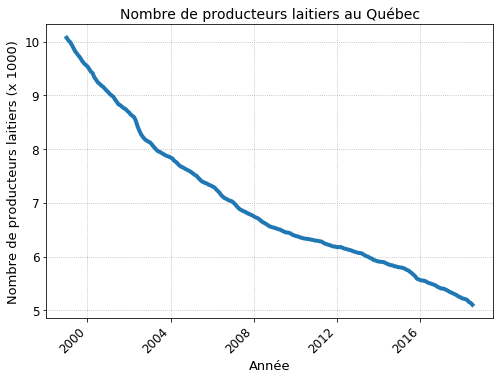

In [206]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(producteurs.temps, producteurs.valeur/1000, linewidth=4)
ax.set_xlabel('Année')
ax.set_ylabel('Nombre de producteurs laitiers (x 1000)')
ax.set_title('Nombre de producteurs laitiers au Québec')
ax.grid(linestyle = 'dotted')

fig.autofmt_xdate(rotation=45)
plt.show()

Sources: Institut de la statistique du Québec (ISQ), Fédération des producteurs de lait du Québec (FPLQ)
<br>
Compilation: [Institut de la statistique du Québec](http://www.bdso.gouv.qc.ca/pls/ken/ken214_tabl_detl.page_detl?p_iden_tran=REPERK547XJ20-14125033193695l7&p_lang=1&p_id_ss_domn=1053&p_id_raprt=1969)

Le Québec compte actuellement quelque 5100 producteurs laitiers, un chiffre qui représente 50% de celui de 1999.

In [160]:
producteursG = producteurs.valeur.groupby(producteurs.temps.dt.year)
producteurs_year = producteursG.sum()/12
# Projection au prorata pour 2018.
producteurs_year[-1:] = producteurs_year[-1:]*12/7

In [161]:
producteurs_year.tail()

temps
2014    5862.000000
2015    5712.750000
2016    5502.750000
2017    5336.000000
2018    5178.714286
Name: valeur, dtype: float64

## Le prix moyenne du lait à la ferme au Québec

In [162]:
prix = read_csv('PrixMoyenne.csv', sep=';', decimal=',', skiprows=1,
                    parse_dates=['Temps'], infer_datetime_format=True)

prix = prix.rename(columns={"Élément statistique": "element",
                            "1er niveau de détail": "detail1",
                            "2ème niveau de détail": "detail2",
                            "3ème niveau de détail": "detail3",
                            "Territoire": "territoire",
                            "Temps": "temps",
                            "Unité de mesure": "unite",
                            "Valeur numérique": "valeur",
                            "Note": "note"})
#prix.head()

In [163]:
prix_b = prix[(prix['detail1'] == 'Total (Type de production ou marché)') &
              (prix['detail2'] == 'Total (Composantes laitières)') &
              (prix['detail3'] == '..Montant brut')]
prix_b = prix_b.rename(columns={'valeur': 'Prix moyen brut au Québec'})

In [164]:
prix_b.tail()

,element,detail1,detail2,detail3,territoire,temps,unite,Prix moyen brut au Québec,note
230,Prix moyen du lait,Total (Type de production ou marché),Total (Composantes laitières),..Montant brut,Québec,2018-03-01,$/hl,75.0989,NaN
231,Prix moyen du lait,Total (Type de production ou marché),Total (Composantes laitières),..Montant brut,Québec,2018-04-01,$/hl,72.1910,NaN
232,Prix moyen du lait,Total (Type de production ou marché),Total (Composantes laitières),..Montant brut,Québec,2018-05-01,$/hl,74.5614,NaN
233,Prix moyen du lait,Total (Type de production ou marché),Total (Composantes laitières),..Montant brut,Québec,2018-06-01,$/hl,72.7757,NaN
234,Prix moyen du lait,Total (Type de production ou marché),Total (Composantes laitières),..Montant brut,Québec,2018-07-01,$/hl,73.3016,NaN


In [165]:
prix_bG = prix_b['Prix moyen brut au Québec'].groupby(prix_b.temps.dt.year)
prix_b_year = prix_bG.sum()/12
# Projection au prorata pour 2018.
prix_b_year[2018] = prix_b_year[2018]*12/7

In [166]:
prix_b_year.tail()

temps
2014    83.009325
2015    78.574733
2016    78.258592
2017    77.691883
2018    74.497900
Name: Prix moyen brut au Québec, dtype: float64

In [167]:
prix_n = prix[(prix['detail1'] == 'Total (Type de production ou marché)') &
              (prix['detail2'] == 'Total (Composantes laitières)') &
              (prix['detail3'] == '..Montant net')]
prix_n = prix_n.rename(columns={'valeur': 'Prix moyen net au Québec'})

In [168]:
prix_nG = prix_n['Prix moyen net au Québec'].groupby(prix_n.temps.dt.year)
prix_n_year = prix_nG.sum()/12
# Projection au prorata pour 2018.
prix_n_year[2018] = prix_n_year[2018]*12/7

In [169]:
CdP = read_csv('CdP.csv')

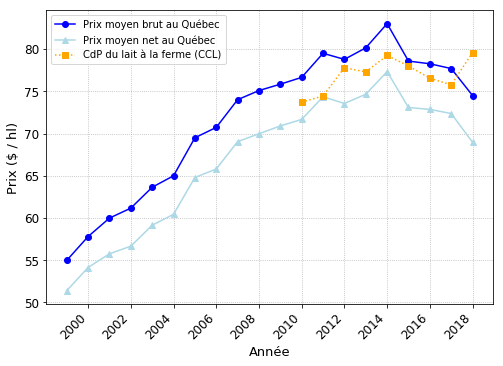

In [207]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(np.arange(1999, 2019, step=1),
        prix_b_year, marker = 'o', c = 'blue')
ax.plot(np.arange(1999, 2019, step=1),
        prix_n_year, marker = '^', c = 'lightblue')
ax.plot(CdP['Année'], CdP['CdP du lait à la ferme (CCL)'],
        marker = 's', c = 'orange', linestyle='dotted')

ax.set_xticks(np.arange(2000, 2020, step=2))
ax.set_xlabel('Année')
ax.set_ylabel('Prix ($ / hl)')
ax.grid(linestyle = 'dotted')
ax.legend()
fig.autofmt_xdate(rotation=45)
plt.show()

Sources: Institut de la statistique du Québec (ISQ), Fédération des producteurs de lait du Québec (FPLQ), [Commission Canadienne du lait (CCL)](http://www.cdc-ccl.gc.ca/CDC/index-fra.php?link=209)
<br>
Compilations: [Institut de la statistique du Québec](http://www.bdso.gouv.qc.ca/pls/ken/ken214_tabl_detl.page_detl?p_iden_tran=REPERK547XJ20-14125033193695l7&p_lang=1&p_id_ss_domn=1053&p_id_raprt=1969)

## La Production, les Frais et les Recettes Laitières au Québec

In [171]:
production = read_csv('Production.csv', sep=';', decimal=',', skiprows=1,
                    parse_dates=['Temps'], infer_datetime_format=True)

production = production.rename(columns={"Élément statistique": "element",
                            "1er niveau de détail": "detail1",
                            "2ème niveau de détail": "detail2",
                            "Territoire": "territoire",
                            "Temps": "temps",
                            "Unité de mesure": "unite",
                            "Valeur numérique": "valeur",
                            "Note": "note"})
#production.head()

In [172]:
prod_lait = production[(production.detail1 == 'Total (Type de production ou marché)') &
                       (production.detail2 == 'Total (Composantes laitières)')]
prod_lait.tail()

,element,detail1,detail2,territoire,temps,unite,valeur,note
230,Production laitière,Total (Type de production ou marché),Total (Composantes laitières),Québec,2018-03-01,hl,2932078.73,NaN
231,Production laitière,Total (Type de production ou marché),Total (Composantes laitières),Québec,2018-04-01,hl,2835211.42,NaN
232,Production laitière,Total (Type de production ou marché),Total (Composantes laitières),Québec,2018-05-01,hl,2925285.06,NaN
233,Production laitière,Total (Type de production ou marché),Total (Composantes laitières),Québec,2018-06-01,hl,2820540.22,NaN
234,Production laitière,Total (Type de production ou marché),Total (Composantes laitières),Québec,2018-07-01,hl,2822621.42,NaN


In [173]:
prod_laitG = prod_lait.valeur.groupby(prod_lait.temps.dt.year)
prod_lait_year = prod_laitG.sum()

# Projection au prorata pour 2018.
prod_lait_year[-1:] = prod_lait_year[-1:]*12/7

In [174]:
production_producteur = prod_lait_year/producteurs_year

In [175]:
#prod_lait_year.tail()

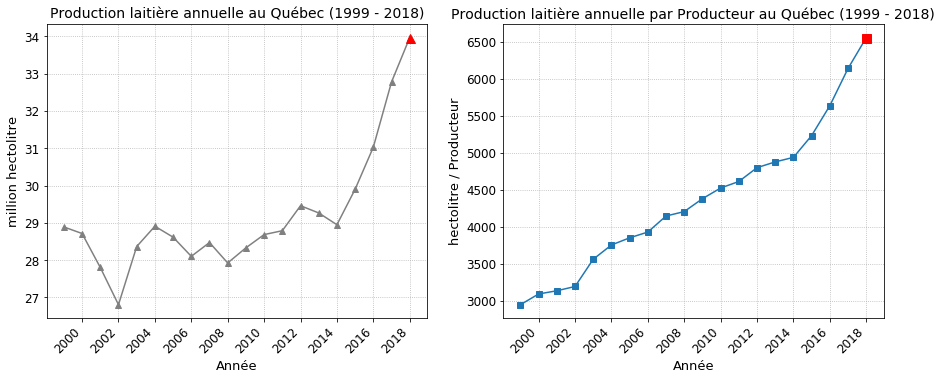

In [208]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

ax1.plot(np.arange(1999, 2019, step=1),
         prod_lait_year/10**6, marker = '^', c = 'grey')
ax1.plot(prod_lait_year[-1:]/10**6, marker = '^', c = 'red', markersize = 9)

ax1.set_xticks(np.arange(2000, 2020, step=2))
ax1.set_xlabel('Année')
ax1.set_ylabel('million hectolitre')
ax1.set_title('Production laitière annuelle au Québec (1999 - 2018)')
ax1.grid(linestyle = 'dotted')

ax2.plot(np.arange(1999, 2019, step=1),
         production_producteur, marker = 's')
ax2.plot(prod_lait_year[-1:]/producteurs_year[-1:], marker = 's', c = 'red', markersize = 9)
ax2.set_xticks(np.arange(2000, 2020, step=2))
ax2.set_xlabel('Année')
ax2.set_ylabel('hectolitre / Producteur')
ax2.set_title('Production laitière annuelle par Producteur au Québec (1999 - 2018)')
ax2.grid(linestyle = 'dotted')

fig.autofmt_xdate(rotation=45)
plt.show()

Les symboles rouges représentent les projections au prorata pour 2018.
<br><br>
Sources: Institut de la statistique du Québec (ISQ), Fédération des producteurs de lait du Québec (FPLQ)
<br>
Compilation: [Institut de la statistique du Québec](http://www.bdso.gouv.qc.ca/pls/ken/ken214_tabl_detl.page_detl?p_iden_tran=REPERK547XJ20-14125033193695l7&p_lang=1&p_id_ss_domn=1053&p_id_raprt=1969)

In [179]:
prod_lait_mg = production[(production.detail1 == 'Total (Type de production ou marché)') &
                       (production.detail2 == 'Matière grasse')]
#prod_lait_mg.tail()

In [180]:
prod_lait_mgG = prod_lait_mg.valeur.groupby(prod_lait_mg.temps.dt.year)
prod_lait_mg_year = prod_lait_mgG.sum()

# Projection au prorata pour 2018.
prod_lait_mg_year[2018] = prod_lait_mg_year[2018]*12/7

In [436]:
quota_m.tail()

,element,detail,territoire,temps,unite,valeur,note
465,Droit de production (matière grasse),Mensuel,Québec,2018-03-01,kg,12358259,NaN
466,Droit de production (matière grasse),Mensuel,Québec,2018-04-01,kg,11953051,NaN
467,Droit de production (matière grasse),Mensuel,Québec,2018-05-01,kg,12165295,NaN
468,Droit de production (matière grasse),Mensuel,Québec,2018-06-01,kg,11774861,NaN
469,Droit de production (matière grasse),Mensuel,Québec,2018-07-01,kg,11741991,NaN


In [440]:
quota_mG = quota_m.valeur.groupby(quota_m.temps.dt.year)
quota_year = quota_mG.sum()

# Projection au prorata pour 2018.
quota_year[2018] = quota_year[2018]*12/7

quota_year.tail()
#quota_m.tail()

temps
2014    109135282
2015    111168064
2016    123797137
2017    140707112
2018    143176390
Name: valeur, dtype: int64

In [435]:
#prod_lait_mg_year

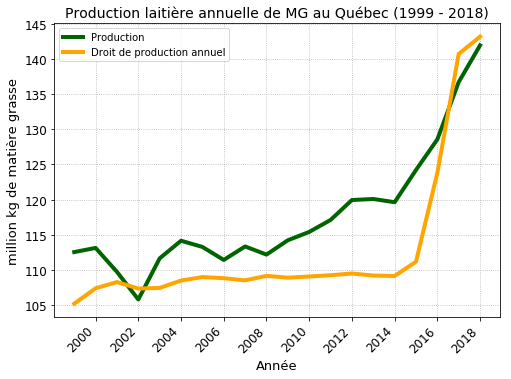

In [472]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(np.arange(1999, 2019, step=1),
        prod_lait_mg_year/10**6, c = 'darkgreen', linewidth = 4,
        label = 'Production')
#ax.scatter(2018, prod_lait_mg_year[-1:]/10**6, c = 'darkgreen',
#           label = 'Projection 2018')
ax.plot(np.arange(1999, 2019, step=1),
        quota_year/10**6, c = 'orange', linewidth = 4,
        label = 'Droit de production annuel')
#ax.scatter(quota_year[-1:]/10**6,
#        marker = 'o', c = 'red', markersize = 9)

ax.set_xticks(np.arange(2000, 2020, step=2))
ax.set_xlabel('Année')
ax.set_ylabel('million kg de matière grasse')
ax.set_title('Production laitière annuelle de MG au Québec (1999 - 2018)')
ax.grid(linestyle = 'dotted')

ax.legend()
fig.autofmt_xdate(rotation=45)
plt.show()

Le symbole rouge représente le projection au prorata pour 2018.
<br><br>
Sources: Institut de la statistique du Québec (ISQ), Fédération des producteurs de lait du Québec (FPLQ)
<br>
Compilation: [Institut de la statistique du Québec](http://www.bdso.gouv.qc.ca/pls/ken/ken214_tabl_detl.page_detl?p_iden_tran=REPERK547XJ20-14125033193695l7&p_lang=1&p_id_ss_domn=1053&p_id_raprt=1969)

In [183]:
#prod_lait_year.tail(12)
production_producteur.tail()

temps
2014    4938.669759
2015    5234.274780
2016    5639.135808
2017    6143.050039
2018    6559.264288
Name: valeur, dtype: float64

On observe une croissance importante de la production (hausse du droit de produire) à partir de 2014. **On doit montrer que cella est dû à une croissance de la demande de matière grasse pour le lait de transformation au cours des dernières années (Rapport annuel de gestion 2016-2017, RMAAQ)**. En outre, une augmentation de la production par producteur ces dernières années est observée, ce qui indique la sortie encore plus rapide des petits producteurs du marché laitiers au Québec à partir de 2014.

In [184]:
frais = read_csv('Frais.csv', sep=';', decimal=',', skiprows=1,
                    parse_dates=['Temps'], infer_datetime_format=True)

frais = frais.rename(columns={"Élément statistique": "element",
                            "1er niveau de détail": "detail",
                            "Territoire": "territoire",
                            "Temps": "temps",
                            "Unité de mesure": "unite",
                            "Valeur numérique": "valeur",
                            "Note": "note"})
#frais.head()

In [185]:
frais_total = frais[frais.detail == 'Total (Nature des frais)']

In [186]:
#frais_total.tail()

In [187]:
frais_totalG = frais_total.valeur.groupby(frais_total.temps.dt.year)
frais_total_year = frais_totalG.sum()

# Projection au prorata pour 2018.
frais_total_year[-1:] = frais_total_year[-1:]*12/7

In [188]:
frais_total_year.tail()

temps
2014    164331.3
2015    164179.9
2016    167546.2
2017    174426.1
2018    188016.0
Name: valeur, dtype: float64

In [189]:
recettes = read_csv('Recettes.csv', sep=';', decimal=',', skiprows=1,
                    parse_dates=['Temps'], infer_datetime_format=True)

recettes = recettes.rename(columns={"Élément statistique": "element",
                            "1er niveau de détail": "detail1",
                            "2ème niveau de détail": "detail2",
                            "3ème niveau de détail": "detail3",
                            "4ème niveau de détail": "detail4",
                            "Territoire": "territoire",
                            "Temps": "temps",
                            "Unité de mesure": "unite",
                            "Valeur numérique": "valeur",
                            "Note": "note"})
#recettes.head()

In [190]:
recettes_brutes = recettes[(recettes.detail1 == 'Total (Type de production ou marché)') &
                          (recettes.detail2 == 'Total (Composantes laitières)') &
                          (recettes.detail3 == '..Montant brut') &
                          (recettes.detail4 == 'Total (Provenance)')]

In [191]:
#recettes_brutes.tail()

### Quelle est la progression de l'industrie laitière au Québec au cours des dix dernières années ?

### La Production

In [192]:
recettes_brutesG = recettes_brutes.valeur.groupby(recettes_brutes.temps.dt.year)
recettes_brutes_year = recettes_brutesG.sum()

# Projection au prorata pour 2018.
recettes_brutes_year[-1:] = recettes_brutes_year[-1:]*12/7

In [193]:
#recettes_brutes_year.tail(12)
#frais_total_year.tail()

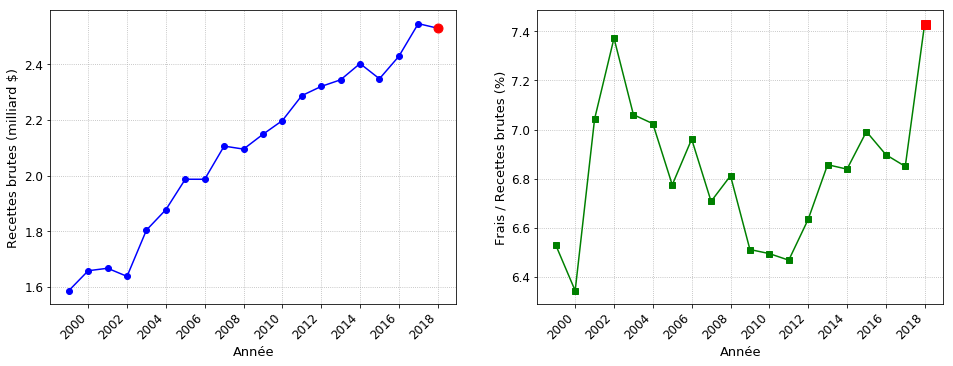

In [210]:
#fig, ax = plt.subplots(figsize=(8, 6))
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))


ax1.plot(np.arange(1999, 2019, step=1), recettes_brutes_year/10**6,
        marker = 'o', c = 'b')
ax1.plot(recettes_brutes_year[-1:]/10**6, marker = 'o', c = 'r', markersize = 9)
ax1.set_xticks(np.arange(2000, 2020, step=2))
ax1.set_xlabel('Année')
ax1.set_ylabel('Recettes brutes (milliard $)')
ax1.grid(linestyle = 'dotted')

ax2.plot(np.arange(1999, 2019, step=1), frais_total_year * 100 /
        recettes_brutes_year, marker = 's', c = 'green')
ax2.plot(frais_total_year[-1:] * 100 /
        recettes_brutes_year[-1:], marker = 's', c = 'r', markersize = 9)
ax2.set_xticks(np.arange(2000, 2020, step=2))
ax2.set_xlabel('Année')
ax2.set_ylabel('Frais / Recettes brutes (%)')
ax2.grid(linestyle = 'dotted')

fig.autofmt_xdate(rotation=45)

plt.show()

Les symboles rouges représentent des estimations au prorata pour 2018.
<br><br>
Sources: Institut de la statistique du Québec (ISQ), Fédération des producteurs de lait du Québec (FPLQ)
<br>
Compilation: [Institut de la statistique du Québec](http://www.bdso.gouv.qc.ca/pls/ken/ken214_tabl_detl.page_detl?p_iden_tran=REPERK547XJ20-14125033193695l7&p_lang=1&p_id_ss_domn=1053&p_id_raprt=1969)

Au cours des dix dernières années les recettes bruttes de la production latière au Québec ont augmenté de 5%, escomptés à l'inflation ([IPC](https://www.banqueducanada.ca/taux/renseignements-complementaires/feuille-de-calcul-de-linflation/)) au cours de la période (16%). Pendant la même période, la production de lait est passé de 2,11 à 2,55 millions de hectolitres par année, soit une croissance de 15%. On a vu (figure ci-dessus - **Production laitière annuelle**) qu'une partie importante de cette augmentation s'est produite au cours des trois dernières années.

### La Transformation

### La Comsommation

# La Demande

## Revue des Marchés

In [195]:
demande = read_csv('demande.csv')

In [233]:
demande.head(12)

,Année,Demande Total,Lait de Transformation,Lait de Consommation,P5,Provinces de l'ouest,Programmes d'Innovation,Production
0,2017,368.75,253.49,114.06,76.83,35.89,1.20,369.24
1,2016,354.27,239.03,114.08,76.55,36.03,1.16,344.53
2,2015,332.59,217.19,115.48,78.02,35.98,NaN,NaN
3,2014,323.72,202.04,116.17,79.03,35.61,NaN,316.78
4,2013,313.51,193.67,114.92,79.26,35.66,NaN,NaN
5,2012,307.11,191.07,116.04,79.88,36.16,NaN,NaN
6,2011,NaN,189.41,NaN,NaN,NaN,NaN,NaN
7,2010,NaN,185.04,NaN,NaN,NaN,NaN,NaN


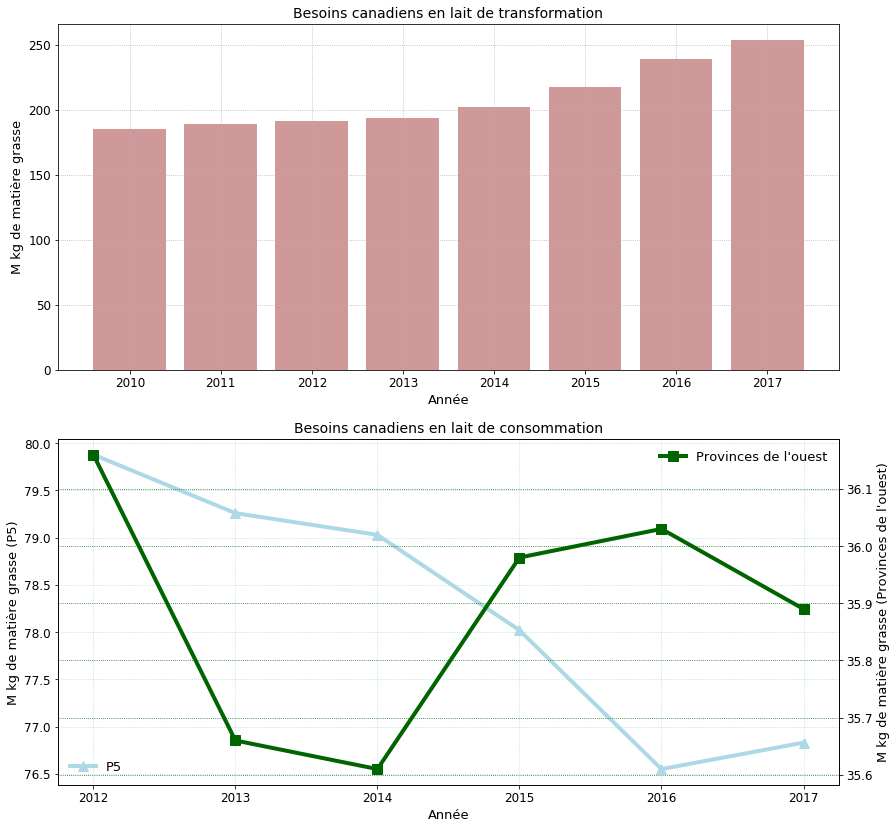

In [282]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14, 14))

ax1.bar(demande['Année'], demande['Lait de Transformation'],
        color='darkred', alpha = 0.4)
ax1.set_xlabel('Année')
ax1.set_ylabel('M kg de matière grasse')
ax1.set_title('Besoins canadiens en lait de transformation')
ax1.grid(linestyle = 'dotted')

ax2.plot(demande['Année'], demande['P5'], marker = '^',
         color='lightblue', linewidth=4, markersize = 10)
ax2.set_xlabel('Année')
ax2.set_ylabel('M kg de matière grasse (P5)')
ax2.set_title('Besoins canadiens en lait de consommation')
ax2.legend(fontsize=13, frameon= False, loc = 'lower left')
ax2.grid(linestyle = 'dotted', color='lightblue')

ax22 = ax2.twinx()
ax22.plot(demande['Année'], demande["Provinces de l'ouest"], marker = 's',
         color='darkgreen', linewidth=4, markersize = 10)
ax22.set_ylabel("M kg de matière grasse (Provinces de l'ouest)")
ax22.grid(linestyle = 'dotted')
ax22.legend(fontsize=13, frameon= False, loc = 'upper right')
ax22.grid(linestyle = 'dotted', color='darkgreen')

plt.show()

Source: [Les Producteurs de lait du Québec](http://lait.org/leconomie-du-lait/statistiques/)
<br><br>
**Entente P5** : *L'Île-du-Prince-Édouard, la Nouvelle-Écosse, le Nouveau-Brunswick, le Québec et l'Ontario collaborent et partagent les revenus depuis la signature de l'Entente sur mise en commun de tout le lait en 1996. Cette entente a par la suite été mise à jour puis remplacée par l'Accord sur la mise en commun du lait de l'Est du Canada (Entente P5) en avril 2010* ([Commission canadienne du lait](http://www.cdc-ccl.gc.ca/CDC/index-fra.php?id=3810)).

**Entente sur la mise en commun du lait de l'Ouest (MCLO)** : *En mars 1997, les quatre provinces de l’Ouest (le Manitoba, la Saskatchewan, l’Alberta et la Colombie-Britannique) ont mis en oeuvre un système de mise en commun de tout le lait qui prévoit le partage des revenus et des marchés de toutes les classes de lait* ([Commission canadienne du lait](http://www.cdc-ccl.gc.ca/CDC/index-fra.php?id=3810)).

## Ventes commerciales de lait et de crème
Source: Statistique Canada - Tableau 32-10-0114-01 (anciennement CANSIM 003-0012)

In [248]:
ventes = read_csv('ventes_canada_6_types_lait.csv', sep=';',
                    parse_dates=['PÉRIODE DE RÉFÉRENCE'], infer_datetime_format=True)
ventes.tail()

,PÉRIODE DE RÉFÉRENCE,GÉO,DGUID,Produits de base,UNITÉ DE MESURE,IDENTIFICATEUR D'UNITÉ DE MESURE,FACTEUR SCALAIRE,IDENTIFICATEUR SCALAIRE,VECTEUR,COORDONNÉES,VALEUR,STATUS,SYMBOLE,TERMINÉ,DÉCIMALES
43804,2018-06-01,Autres provinces,NaN,Crème à céréale,Kilolitres,195,unités,0,v382584,12.6,354.0,NaN,NaN,NaN,0
43805,2018-06-01,Autres provinces,NaN,Crème de table,Kilolitres,195,unités,0,v382596,12.7,5529.0,NaN,NaN,NaN,0
43806,2018-06-01,Autres provinces,NaN,Crème à fouetter,Kilolitres,195,unités,0,v382608,12.8,NaN,x,NaN,NaN,0
43807,2018-06-01,Autres provinces,NaN,Crème sure,Kilolitres,195,unités,0,v382620,12.9,NaN,x,NaN,NaN,0
43808,2018-06-01,Autres provinces,NaN,Lait à 1 %,Kilolitres,195,unités,0,v382525,12.1,2674.0,NaN,NaN,NaN,0


In [260]:
ventesCA_tot = ventes[(ventes['GÉO'] == 'Canada')]
ventesCA_tot = ventesCA_tot.rename(columns={"VALEUR": "Canada"}) 
ventesCA_totG = ventesCA_tot['Canada'].groupby(ventesCA_tot['PÉRIODE DE RÉFÉRENCE'].dt.year)
ventesCA_tot_year = ventesCA_totG.sum()
# Projection au prorata pour 2018.
ventesCA_tot_year[2018] = ventesCA_tot_year[2018]*12/6

ventesQC_tot = ventes[(ventes['GÉO'] == 'Québec')]
ventesQC_tot = ventesQC_tot.rename(columns={"VALEUR": "Québec"}) 
ventesQC_totG = ventesQC_tot['Québec'].groupby(ventesQC_tot['PÉRIODE DE RÉFÉRENCE'].dt.year)
ventesQC_tot_year = ventesQC_totG.sum()
# Projection au prorata pour 2018.
ventesQC_tot_year[2018] = ventesQC_tot_year[2018]*12/6

ventesON_tot = ventes[(ventes['GÉO'] == 'Ontario')]
ventesON_tot = ventesON_tot.rename(columns={"VALEUR": "Ontario"})
ventesON_totG = ventesON_tot['Ontario'].groupby(ventesON_tot['PÉRIODE DE RÉFÉRENCE'].dt.year)
ventesON_tot_year = ventesON_totG.sum()
# Projection au prorata pour 2018.
ventesON_tot_year[2018] = ventesON_tot_year[2018]*12/6

In [261]:
ventesCA_tot_year.tail()

PÉRIODE DE RÉFÉRENCE
2014    2908626.0
2015    2905875.0
2016    2897161.0
2017    2832738.0
2018    2836556.0
Name: Canada, dtype: float64

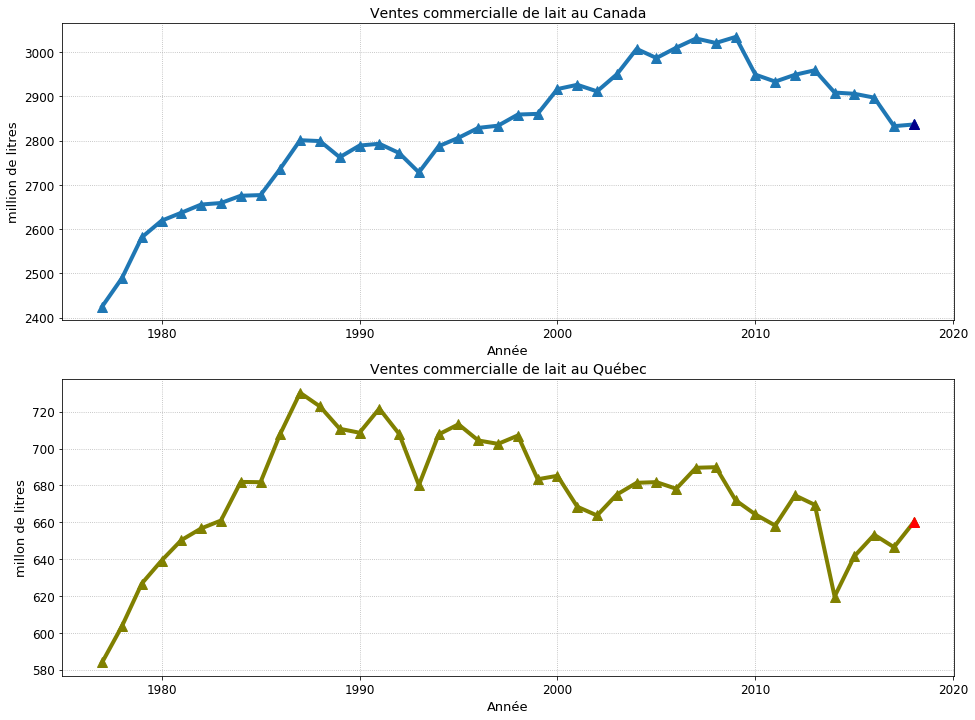

In [278]:
#fig, ax = plt.subplots(figsize=(8, 6))
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(16, 12))

ax1.plot(ventesCA_tot_year/1000, marker = '^',
         linewidth=4, markersize = 10)
ax1.plot(ventesCA_tot_year[-1:]/1000, marker = '^', c = 'darkblue',
         linewidth=4, markersize = 10)
ax1.set_xlabel('Année')
ax1.set_ylabel('million de litres')
ax1.set_title('Ventes commercialle de lait au Canada')
ax1.grid(linestyle = 'dotted')
#ax1.legend()

ax2.plot(ventesQC_tot_year/1000, marker = '^', c = 'olive',
         linewidth=4, markersize = 10)
ax2.plot(ventesQC_tot_year[-1:]/1000, marker = '^', c = 'red',
         linewidth=4, markersize = 10)
#ax2.plot(ventesON_tot_year/1000, marker = '^', c = 'orange')
#ax2.plot(ventesON_tot_year[-1:]/1000, marker = '^', c = 'darkorange')
ax2.set_xlabel('Année')
ax2.set_ylabel('millon de litres')
ax2.set_title('Ventes commercialle de lait au Québec')
ax2.grid(linestyle = 'dotted')
#ax2.legend()

#fig.autofmt_xdate(rotation=45)
plt.show()

Source: Statistique Canada. [Tableau 32-10-0114-01 (anciennement CANSIM  003-0012) Ventes commerciales de lait et de crème](https://www150.statcan.gc.ca/t1/tbl1/fr/tv.action?pid=3210011401)

In [120]:
ventesCA_tot_year.tail()

PÉRIODE DE RÉFÉRENCE
2014    2908626.0
2015    2905875.0
2016    2897161.0
2017    2832738.0
2018    1418278.0
Name: Canada, dtype: float64

In [125]:
ventesQC_tot_year.tail()

PÉRIODE DE RÉFÉRENCE
2014    619708.0
2015    641603.0
2016    653234.0
2017    646471.0
2018    330026.0
Name: Québec, dtype: float64

In [171]:
print('Maximum de ventes commercialles au Canada (2009): {0:0.2f} milliards de litres'.format(
    (ventesCA_tot_year.max()/10**6)))

print('Ventes commercialles au Canada en 2017: {0:0.2f} milliards de litres'.format(
    (ventesCA_tot_year[2017]/10**6)))

print('Ventes commercialles au Québec en 2017: {0:0.0f} millions de litres'.format(
    (ventesQC_tot_year[2017]/10**3)))

Maximum de ventes commercialles au Canada (2009): 3.03 milliards de litres
Ventes commercialles au Canada en 2017: 2.83 milliards de litres
Ventes commercialles au Québec en 2017: 646 millions de litres


Les ventes commerciales totales de lait ont culminé, atteignant 3,03 milliards de litres au Canada en 2009, puis ont baissé à 2,83 milliards de litres en 2017. Au Québec, les ventes ont diminué régulièrement depuis 1987. En 2017, les ventes commercielles de lait au Québec étaient de 646 millions de litres.

In [72]:
ventesCA_homo = ventes[(ventes['GÉO'] == 'Canada') &
                     (ventes['Produits de base'] == 'Lait homogénéisé')]
ventesCA_homo = ventesCA_homo.rename(columns={"VALEUR": "Lait homogénéisé"})                 
ventesCA_homoG = ventesCA_homo['Lait homogénéisé'].groupby(ventesCA_homo['PÉRIODE DE RÉFÉRENCE'].dt.year)
ventesCA_homo_year = ventesCA_homoG.sum()

ventesCA_lait2 = ventes[(ventes['GÉO'] == 'Canada') &
                     (ventes['Produits de base'] == 'Lait à 2 %')]
ventesCA_lait2 = ventesCA_lait2.rename(columns={"VALEUR": "Lait à 2 %"})                 
ventesCA_lait2G = ventesCA_lait2['Lait à 2 %'].groupby(ventesCA_lait2['PÉRIODE DE RÉFÉRENCE'].dt.year)
ventesCA_lait2_year = ventesCA_lait2G.sum()

In [32]:
ventes[(ventes['GÉO'] == 'Canada') &
       (ventes['Produits de base'] == 'Lait homogénéisé') |
       (ventes['Produits de base'] == 'Lait à 2 %') |
       (ventes['Produits de base'] == 'Lait écrémé') |
       (ventes['Produits de base'] == 'Babeurre') |
       (ventes['Produits de base'] == 'Lait au chocolat et autres laits aromatisés') |
       (ventes['Produits de base'] == 'Lait à 1 %')].tail()

,PÉRIODE DE RÉFÉRENCE,GÉO,DGUID,Produits de base,UNITÉ DE MESURE,IDENTIFICATEUR D'UNITÉ DE MESURE,FACTEUR SCALAIRE,IDENTIFICATEUR SCALAIRE,VECTEUR,COORDONNÉES,VALEUR,STATUS,SYMBOLE,TERMINÉ,DÉCIMALES
43799,2018-06-01,Autres provinces,NaN,Lait à 2 %,Kilolitres,195,unités,0,v382536,12.2,6361.0,NaN,NaN,NaN,0
43800,2018-06-01,Autres provinces,NaN,Lait écrémé,Kilolitres,195,unités,0,v382548,12.3,1942.0,NaN,NaN,NaN,0
43801,2018-06-01,Autres provinces,NaN,Babeurre,Kilolitres,195,unités,0,v382560,12.4,62.0,NaN,NaN,NaN,0
43802,2018-06-01,Autres provinces,NaN,Lait au chocolat et autres laits aromatisés,Kilolitres,195,unités,0,v382572,12.5,4156.0,NaN,NaN,NaN,0
43808,2018-06-01,Autres provinces,NaN,Lait à 1 %,Kilolitres,195,unités,0,v382525,12.1,2674.0,NaN,NaN,NaN,0


In [332]:
?read_csv

# Répartition du quota de lait total par province

In [441]:
qqm = read_csv('qqm.csv')
qqm.tail()

,Année,BC,AB,SK,MB,MCLO,ON,QC,NB,NS,PE,P5,NL,CA
5,2013,25.83,25.70,8.95,12.50,72.98,99.91,116.19,5.27,6.75,3.98,232.11,1.89,306.99
6,2014,26.01,26.77,9.75,13.51,76.03,98.48,124.08,4.43,5.39,4.53,236.91,1.96,314.91
7,2015,26.68,27.65,9.86,13.84,78.04,100.82,126.54,4.33,5.41,4.55,241.64,1.97,321.65
8,2016,30.08,29.89,10.41,14.54,84.91,111.80,128.86,5.89,7.56,4.43,258.54,2.54,345.99
9,2017,32.58,32.37,11.28,15.75,91.98,118.61,136.71,6.25,8.02,4.70,274.29,2.69,368.96


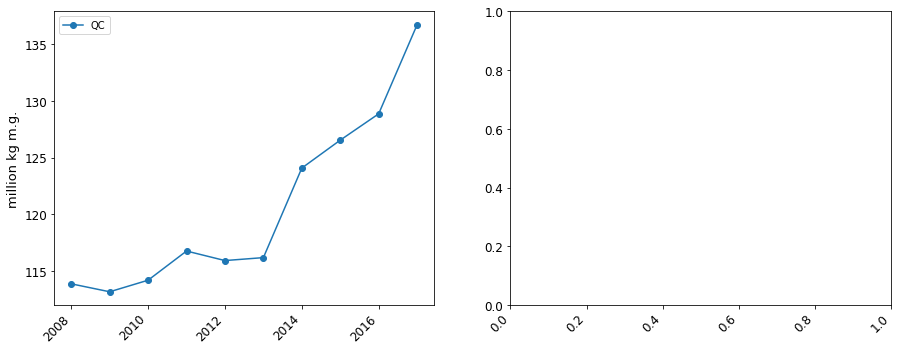

In [432]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

ax1.plot(qqm['Année'], qqm.QC, marker = 'o')
ax1.set_ylabel('million kg m.g.')
#ax1.set_title('Parts provinciales (au 31 juillet 2015)')
ax1.legend()

#ax2.bar(pp.Province, pp.Lait)
#ax2.set_ylabel('Lait (millions hl / Année)')
#ax2.set_title('Parts provinciales (au 31 juillet 2015)')

fig.autofmt_xdate(rotation=45)

plt.show()

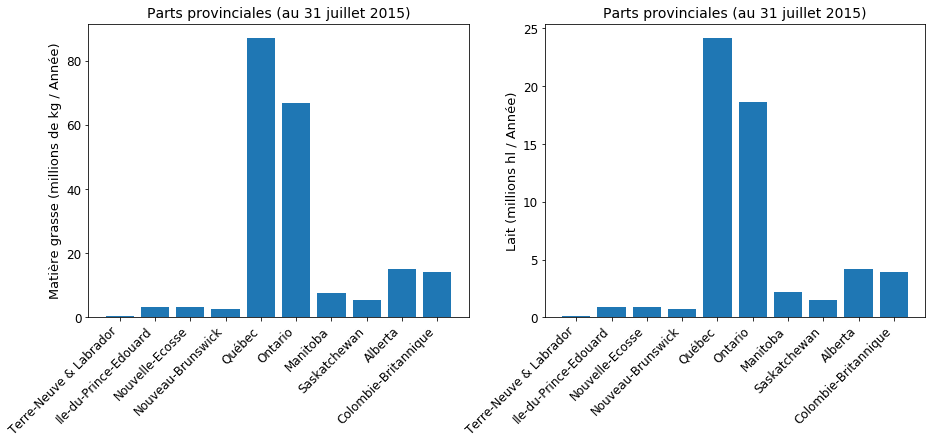

In [405]:
# Le quota de mise en marché (QMM)

pp = read_csv('CCL_part_provinciales_31_07_2015.csv', sep = ';', decimal = ',')
pp['f_MG'] = pp['MG']/sum(pp['MG'])
pp['f_lait'] = pp['Lait']/sum(pp['Lait'])
pp['f'] = (pp['MG'] + pp['Lait'])/(sum(pp['MG']) + sum(pp['Lait']))
#pp.head()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

ax1.bar(pp.Province, pp.MG)
ax1.set_ylabel('Matière grasse (millions de kg / Année)')
ax1.set_title('Parts provinciales (au 31 juillet 2015)')

ax2.bar(pp.Province, pp.Lait)
ax2.set_ylabel('Lait (millions hl / Année)')
ax2.set_title('Parts provinciales (au 31 juillet 2015)')

fig.autofmt_xdate(rotation=45)

plt.show()

### Le consommateur canadien paie t-il trop chère les produits laitiers?

In [589]:
prix_lait_world = read_csv('prix_lait_consommation.csv', skiprows = 2)
prixCA_US = read_csv('prix.csv', skiprows = 2)
#prixCA_US.head(10)
#prix_lait_world.head()

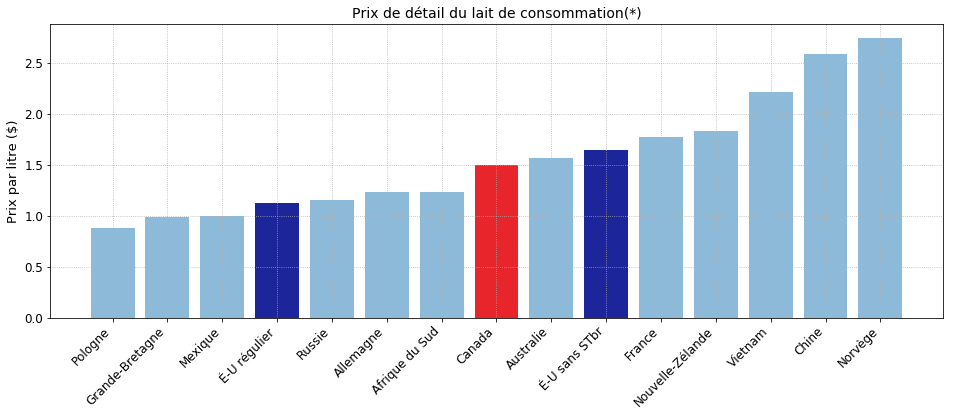

In [588]:
fig, ax = plt.subplots(figsize=(16, 6))

y_pos = np.arange(len(prix_lait_world))
 
ax.bar(y_pos, prix_lait_world.iloc[:,1], align='center', alpha=0.5)
ax.bar(7, prix_lait_world.iloc[7,1], align='center', color = 'r', alpha=0.8)
ax.bar(9, prix_lait_world.iloc[9,1], align='center', color = 'darkblue', alpha=0.8)
ax.bar(3, prix_lait_world.iloc[3,1], align='center', color = 'darkblue', alpha=0.8)

plt.xticks(y_pos, prix_lait_world['Pays'])
ax.set_ylabel('Prix par litre ($)')
ax.set_title('Prix de détail du lait de consommation(*)')
fig.autofmt_xdate(rotation=45)
plt.grid(linestyle = 'dotted')
plt.show()

(*) L'étude a considéré une période de 12 mois se terminant en octobre 2017.
<br>
Source: [Rapport sur le prix du lait frais, Nielsen, 2017 et Export Action Global](https://www.exportactionglobal.com/dairyreport/)

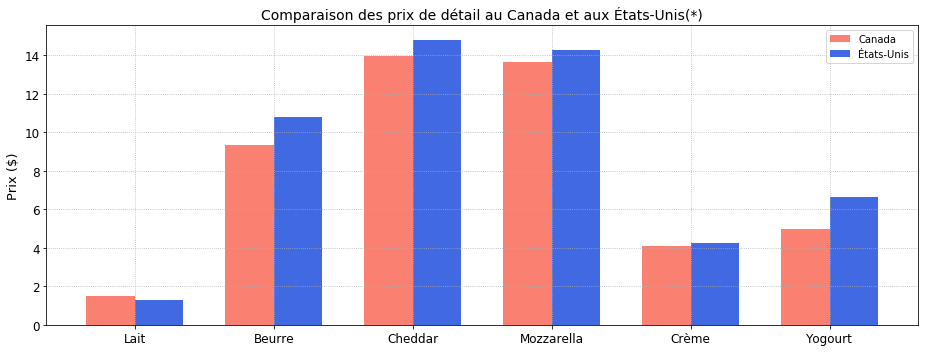

In [590]:
n_groups = 6
 
# create plot
fig, ax = plt.subplots(figsize=(13, 5))

index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, prixCA_US.Canada, bar_width,
                 color='salmon',
                 label='Canada')
 
rects2 = plt.bar(index + bar_width, prixCA_US['États-Unis'], bar_width,
                 color='royalblue',
                 label='États-Unis')

plt.ylabel('Prix ($)')
plt.title('Comparaison des prix de détail au Canada et aux États-Unis(*)')
plt.xticks(index + bar_width/2, ('Lait', 'Beurre',
                               'Cheddar',
                               'Mozzarella',
                               'Crème',
                               'Yogourt'))
plt.legend()
plt.grid(linestyle = 'dotted')
#fig.autofmt_xdate(rotation=45)
plt.tight_layout()

plt.show()

(*) L'étude a considéré une période de 12 mois se terminant en octobre 2017.
<br>
Source: [Rapport sur le prix du lait frais, Nielsen, 2017 et Export Action Global](https://www.exportactionglobal.com/dairyreport/)

Une étude récente (Rapport sur le prix du lait frais, Nielsen, 2017) montre que les prix de détail moyens du lait frais et d'autres produits laitiers se comparent bien aux prix ailluers dans le monde.



### Et au Québec ?

Au Québec la Régie des marchés agricoles et alimentaires ([RMAAQ](http://www.rmaaq.gouv.qc.ca//index.php?id=49)) gère le prix des produits laitiers en fixant ses prix minimum et maximun au détail. *Pour fixer le prix, la Régie tient compte de la valeur et des caractéristiques du produit, de ses conditions de production, de transport, de transformation et de livraison et de l’utilisation qui en est faite par les marchands de lait ainsi que des intérêts des producteurs, des marchands de lait, des distributeurs et des consommateurs* [(Décision 11155, RMAAQ)](http://www.rmaaq.gouv.qc.ca/fileadmin/DocuCentre/Decision/2017/11155.pdf). La demande, du consommateur et du marché, et l'intérêt des producteurs et des détaillants sont pris en compte.

Dans d'autres provinces, le lait est considéré comme un produit d’appel et le prix au détail n'est pas fixé. *Les détaillants ne font pas d'argent avec le lait, ils peuvent même en perdre. Le but, c'est de vous offrir un produit de base à faibles coûts et de vous attirer dans le magasin pour vous vendre d’autres produits* [(Fillion 2017)](https://ici.radio-canada.ca/nouvelle/1036806/gestion-de-offre-pourquoi-lait-coute-plus-cher-au-quebec).

*Alors, si l'on veut voir les prix baisser au Québec, ce n'est pas l'abandon de la gestion de l'offre qui va servir cet intérêt. C'est plutôt un débat sur la fixation des prix et la possibilité de considérer le lait comme un produit d'appel dans les magasins qui pourrait être lancé* [(Fillion 2017)](https://ici.radio-canada.ca/nouvelle/1036806/gestion-de-offre-pourquoi-lait-coute-plus-cher-au-quebec).

# Un modèle économétrique

Dans un marché sous la gestion de l'offre le prix de marché
la Demande: $$Q = f(P, P^s, P^c, R) + e_{d}$$ 
l'Offre: $$Q = f(P, P^s, P^c, R) + e_{s}$$ 

**Analyse**: Les frais de mise en marché du lait au Québec s'élevent à environ 7%. Ils sont composés de:
- Administration du plan conjoint
- Publicité
- Fonds de développement
- Transport
- Pénalité de qualité
- Pénalité sur le lait canadien de qualité
- Cotisation UPA
- Administration du babillard
- TPS
- TVQ

# Problématique

1. Devrait-on augmenter le quota pour 2019 ?
....

2. **Le consommateur paie t-il trop chère ?**

3. **Les quotas sont-ils trop bas ?**

4. **Quelle est la progression de l'industrie laitière au Québec au cours des dix dernières années ?**

5. **Est-ce que l'écart entre la production et les quotas est stable dans le temps ?**

6. Comment se compare les prix des produits laitiers au Québec versus le reste du Canada ?
...

7. Que fait-on avec le lait de surproduction, comment se porte le marché du lait en poudre au Québec ?
...

Récommandation:
1. Le système actuele empêche des petits producteurs ayant un potentiel d'innovation de se lancer au marché laitier. Je recommande de réduire la valeur des quotas en remboursant les producteurs respectifs à la valeur marchande (24 000 $). Une étude devrait être faite pour stipuler une valeur de quota raisonnable qui considère l'investissement dans les quotas seulement une partie de l'apport en capital initial pour démarrer une nouvelle entreprise.

1. Le Québec est la seule province qui réglemente le prix du lait au détail!

2. Les producteurs ne sont pas bien payés et les consommateurs paient cher à l'épicerie, les frais de mise en marché du lait ne sont pas élevés (7%), alors qui reçoit le gros du gâteau?

Référeces:
1. [Borde, Valérie, ***Les défis du lait québécois*** mai 2016, *L'actualité*](https://lactualite.com/societe/2016/05/10/les-defis-du-lait-quebecois/)
1. [Boyer, Marcel; Charlebois, Sylvain, ***La gestion de l’offre des produits agricoles : un système coûteux pour les consommateurs*** août 2007, *IEDM*](https://www.iedm.org/fr/588-la-gestion-de-loffre-des-produits-agricoles-un-systeme-couteux-pour-les-consommateurs)
1. [Commission Canadienne du lait, ***Rapport annuel de la CCL 2016-2017*** août 2017](http://www.cdc-ccl.gc.ca/CDC/index-fra.php?link=125)
1. [Duhamel, Pierre, ***Lait: une histoire de vaches… et de sous*** juillet 2013, *L'actualité*](https://lactualite.com/lactualite-affaires/2013/07/23/le-lait-une-histoire-de-vaches-et-de-sous/)
1. [Dumais, Mario; Chassin, Youri, ***Les politiques néfastes de gestion de l’offre du Canada*** juin 2015, *IEDM*](http://www.iedm.org/fr/53769-le-point-les-politiques-nefastes-de-gestion-de-l-offre-du-Canada)
1. [Fillion, Gérald, ***Gestion de l'offre : pourquoi le lait coûte-t-il plus cher au Québec?*** mai 2017, ici.radio-canada.ca](https://ici.radio-canada.ca/nouvelle/1036806/gestion-de-offre-pourquoi-lait-coute-plus-cher-au-quebec)
1. [Export Action Global, ***Les Systèmes Laitiers dans le Monde: Les consommateurs et les producteurs canadiens s’en tirent-ils mieux avec le modèle canadien?*** avril 2018](https://www.exportactionglobal.com/dairyreport/)
1. [Gouin, Daniel-Mercier; Doyon, Maurice, ***La gestion de l'offre attaquée à coups de sophismes*** mai 2017, *La Presse*](http://plus.lapresse.ca/screens/c41361e6-1861-4267-b962-f87e74a758d0__7C___0.html)
1. [Grant, Michael; Barichello, Richard; Liew, Mark; Gill, Vijay, ***Réformer la gestion de l’offre laitière : Plaidoyer pour la croissance*** 2014, Ottawa, Le Conference Board du Canada](https://www.conferenceboard.ca/e-library/abstract.aspx?did=6084)
1. [Heminthavong, Khamla, ***Le mécanisme de la gestion de l’offre au Canada*** décembre 2015, *Division de l’économie, des ressources et des affaires internationales*, 2015-138-F](https://bdp.parl.ca/Content/LOP/ResearchPublications/2015-138-f.html?cat=agriculture)
1. [L'Institut économique de Montréal, ***Production laitière : les coûts de la gestion de l’offre au Canada*** février 2005, *Les Notes Économiques*](http://www.caaaq.gouv.qc.ca/userfiles/File/MEIDairy%20fev05_FRENCH.pdf)
1. [Lippert, Owen, ***Milk: A Perfect Mess Revisited*** 2018, iPOLITICS](https://ipolitics.ca/article/milk-a-perfect-mess-revisited/)
1. [Lippert, Owen, ***The Perfect Food in a Perfect Mess: The Cost of Milk in Canada*** 2001, *Public Policy Sources*, 52, The Fraser Institute](https://www.fraserinstitute.org/sites/default/files/PerfectFoodinaPerfectMess.pdf)
1. [L'Union Paysanne, ***Vers une gestion de l’offre 2.0 au Canada*** novembre 2014](https://unionpaysanne.com/publications/)
1. [Les Producteurs de lait du Québec, ***Bilan annuel du marché laitier des Producteurs de lait du Québec - Croissance et investissements dans le secteur laitier, atténués par l'entrée en vigueur des accords commerciaux*** avril 2018, Cision](https://www.newswire.ca/fr/news-releases/bilan-annuel-du-marche-laitier-des-producteurs-de-lait-du-quebec---croissance-et-investissements-dans-le-secteur-laitier-attenues-par-lentree-en-vigueur-des-accords-commerciaux-679406953.html)
1. [Les Protucteurs Laitiers du Canada, ***Pourquoi la gestion de l’offre fonctionne-t-elle pour les Canadiens?*** 2017](https://www.producteurslaitiers.ca/que-faisons-nous/a-propos-de-la-gestion-de-l-offre/pourquoi-la-gestion-de-l-offre-fonctionne-t-elle-pour-les-canadiens)
1. [Les Protucteurs Laitiers du Canada, ***Les producteurs remettent les pendules à l'heure au sujet de la gestion de l'offre deuxième partie*** 2015, communiqué](https://www.producteurslaitiers.ca/salle-de-presse/nouvelles/politique/les-producteurs-remettent-les-pendules-a-l-heure-au-sujet-de-la-gestion-de-l-offre-deuxieme-partie)
1. [Régie des marchés agricoles et alimentaires du Québec, ***Rapport annuel de gestion (2016-2017)*** septembre 2017](http://www.rmaaq.gouv.qc.ca//index.php?id=12)
1. [St. Pierre, Michelle, ***Changements dans les préférences des Canadiens relativement au lait et aux produits laitiers*** avril 2017, *Regards sur l'industrie agro-alimentaire et la communauté agricole*, 21-004-X](https://www150.statcan.gc.ca/n1/pub/21-004-x/2017001/article/14786-fra.htm)